# 📊 Data Exploration and Analysis
## Halal-Haram Food Detection Project

**Tujuan Notebook**: Memahami data secara mendalam tanpa melatih model apapun. Fokus pada analisis distribusi, karakteristik teks, dan pola data.

**Output yang Diharapkan**:
- Pemahaman distribusi label (halal vs haram)
- Analisis karakteristik teks ingredients
- Word clouds untuk visualisasi
- Analisis N-grams untuk pola kata
- Insights untuk strategi modeling

---

## 1. 📚 Import Libraries
Mengimpor semua library yang diperlukan untuk analisis data dan visualisasi.

In [1]:
# Data manipulation dan analisis
import pandas as pd
import numpy as np
from collections import Counter
import re

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK data jika belum ada
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Semua library berhasil diimpor!")

✅ Semua library berhasil diimpor!


## 2. 📂 Load Data
Memuat dataset yang sudah dibersihkan dan melakukan inspeksi awal.

In [2]:
# Load dataset
try:
    df = pd.read_csv('cleaned_dataset.csv')
    print(f"✅ Dataset berhasil dimuat!")
    print(f"📊 Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
except FileNotFoundError:
    print("❌ File 'cleaned_dataset.csv' tidak ditemukan!")
    print("Pastikan file berada di direktori yang sama dengan notebook ini.")

# Tampilkan informasi dasar dataset
print("\n📋 Informasi Dataset:")
print(df.info())

print("\n🔍 Preview 5 baris pertama:")
display(df.head())

print("\n📈 Statistik deskriptif:")
display(df.describe(include='all'))

✅ Dataset berhasil dimuat!
📊 Ukuran dataset: 39787 baris, 2 kolom

📋 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39787 entries, 0 to 39786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39787 non-null  object
 1   label   39787 non-null  object
dtypes: object(2)
memory usage: 621.8+ KB
None

🔍 Preview 5 baris pertama:


,text,label
0,vegetable oil,halal
1,beef stock contains less than of mirepoix carr...,halal
2,clam stock potatoes clams cream vegetable oil ...,haram
3,water cream broccoli celery vegetable oil corn...,haram
4,chicken stock contains less than of yeast extr...,halal



📈 Statistik deskriptif:


,text,label
count,39787,39787
unique,39573,2
top,sugar corn flour wheat flour whole grain oat f...,halal
freq,3,21826


## 3. 🔍 Data Quality Check
Memeriksa kualitas data: missing values, duplikasi, dan konsistensi.

In [3]:
print("🔍 PEMERIKSAAN KUALITAS DATA")
print("=" * 50)

# 1. Missing values
print("\n1️⃣ Missing Values:")
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✅ Tidak ada missing values!")
else:
    print(missing_data[missing_data > 0])

# 2. Duplicate rows
print("\n2️⃣ Duplicate Rows:")
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("✅ Tidak ada baris duplikat!")
else:
    print(f"⚠️ Ditemukan {duplicates} baris duplikat")

# 3. Unique values per kolom
print("\n3️⃣ Unique Values per Kolom:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# 4. Data types
print("\n4️⃣ Data Types:")
print(df.dtypes)

# 5. Sample data untuk setiap kolom
print("\n5️⃣ Sample Data:")
for col in df.columns:
    print(f"\n{col}:")
    print(f"  Sample: {df[col].iloc[0]}")
    print(f"  Type: {type(df[col].iloc[0])}")

🔍 PEMERIKSAAN KUALITAS DATA

1️⃣ Missing Values:
✅ Tidak ada missing values!

2️⃣ Duplicate Rows:
⚠️ Ditemukan 214 baris duplikat

3️⃣ Unique Values per Kolom:
text: 39573 unique values
label: 2 unique values

4️⃣ Data Types:
text     object
label    object
dtype: object

5️⃣ Sample Data:

text:
  Sample: vegetable oil
  Type: <class 'str'>

label:
  Sample: halal
  Type: <class 'str'>


## 4. 📊 Analisis Distribusi Label
Menganalisis distribusi kelas halal vs haram untuk memahami keseimbangan dataset.

📊 ANALISIS DISTRIBUSI LABEL

🎯 Menggunakan kolom 'label' sebagai label

📈 Distribusi Label:
  halal: 21826 samples (54.86%)
  haram: 17961 samples (45.14%)


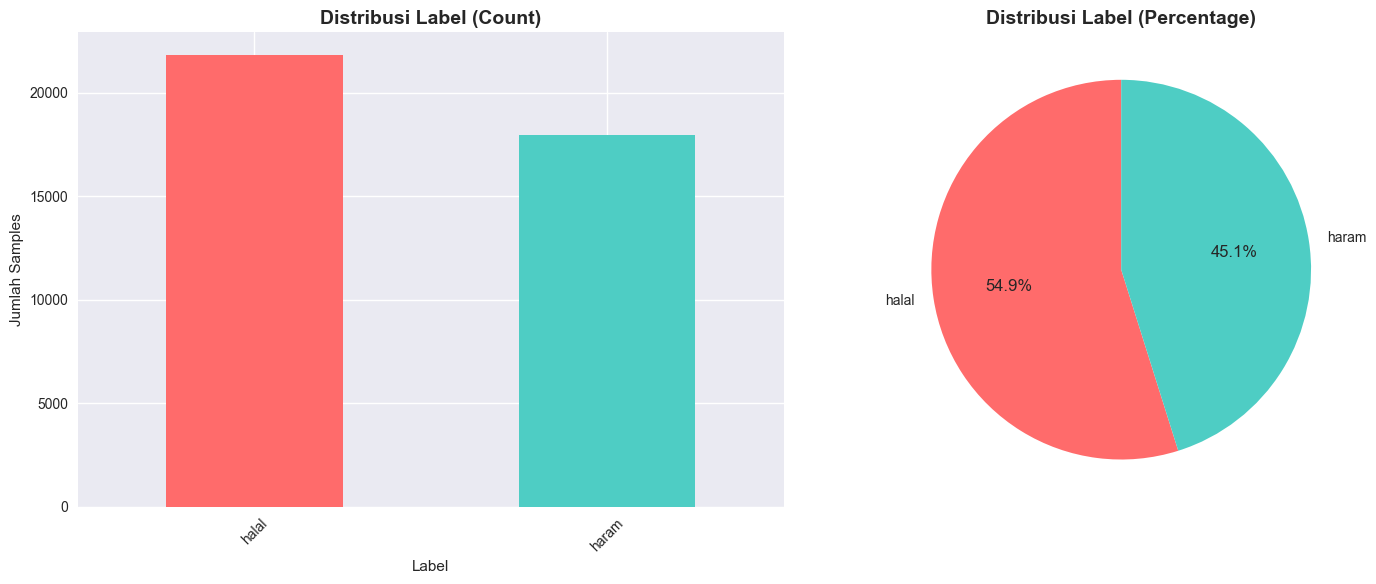


⚖️ Analisis Keseimbangan Dataset:
  Kelas minoritas: 45.14%
  Kelas mayoritas: 54.86%
  Rasio ketidakseimbangan: 1.22:1
  ✅ Dataset SEIMBANG - tidak perlu teknik balancing khusus

💾 Informasi label disimpan untuk notebook selanjutnya


In [4]:
print("📊 ANALISIS DISTRIBUSI LABEL")
print("=" * 50)

# Asumsi kolom label bernama 'label' atau 'category'
# Sesuaikan nama kolom jika berbeda
label_col = None
for col in df.columns:
    if 'label' in col.lower() or 'category' in col.lower() or 'class' in col.lower():
        label_col = col
        break

if label_col is None:
    # Jika tidak ditemukan, gunakan kolom terakhir
    label_col = df.columns[-1]
    print(f"⚠️ Kolom label tidak ditemukan, menggunakan '{label_col}'")

print(f"\n🎯 Menggunakan kolom '{label_col}' sebagai label")

# Hitung distribusi
label_counts = df[label_col].value_counts()
label_percentages = df[label_col].value_counts(normalize=True) * 100

print("\n📈 Distribusi Label:")
for label, count in label_counts.items():
    percentage = label_percentages[label]
    print(f"  {label}: {count} samples ({percentage:.2f}%)")

# Visualisasi distribusi
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
label_counts.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Distribusi Label (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Jumlah Samples')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', 
           colors=['#FF6B6B', '#4ECDC4'], startangle=90)
axes[1].set_title('Distribusi Label (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Analisis keseimbangan dataset
print("\n⚖️ Analisis Keseimbangan Dataset:")
min_class_pct = label_percentages.min()
max_class_pct = label_percentages.max()
imbalance_ratio = max_class_pct / min_class_pct

print(f"  Kelas minoritas: {min_class_pct:.2f}%")
print(f"  Kelas mayoritas: {max_class_pct:.2f}%")
print(f"  Rasio ketidakseimbangan: {imbalance_ratio:.2f}:1")

if imbalance_ratio < 1.5:
    print("  ✅ Dataset SEIMBANG - tidak perlu teknik balancing khusus")
elif imbalance_ratio < 3:
    print("  ⚠️ Dataset SEDIKIT TIDAK SEIMBANG - pertimbangkan class weights")
else:
    print("  ❌ Dataset SANGAT TIDAK SEIMBANG - perlu teknik balancing (SMOTE, undersampling, dll)")

# Simpan informasi label untuk notebook selanjutnya
label_info = {
    'label_column': label_col,
    'label_counts': label_counts.to_dict(),
    'label_percentages': label_percentages.to_dict(),
    'imbalance_ratio': imbalance_ratio,
    'is_balanced': imbalance_ratio < 1.5
}

print(f"\n💾 Informasi label disimpan untuk notebook selanjutnya")

## 5. 📝 Analisis Teks (Ingredients)
Menganalisis karakteristik teks ingredients: panjang, distribusi kata, dll.

📝 ANALISIS KARAKTERISTIK TEKS

📄 Menggunakan kolom 'text' sebagai teks

📊 Statistik Teks Keseluruhan:
  Jumlah Kata:
    Min: 1 kata
    Max: 423 kata
    Mean: 42.13 kata
    Median: 31.00 kata
    Std: 38.82 kata

  Jumlah Karakter:
    Min: 2 karakter
    Max: 2999 karakter
    Mean: 291.99 karakter
    Median: 210.00 karakter
    Std: 272.83 karakter


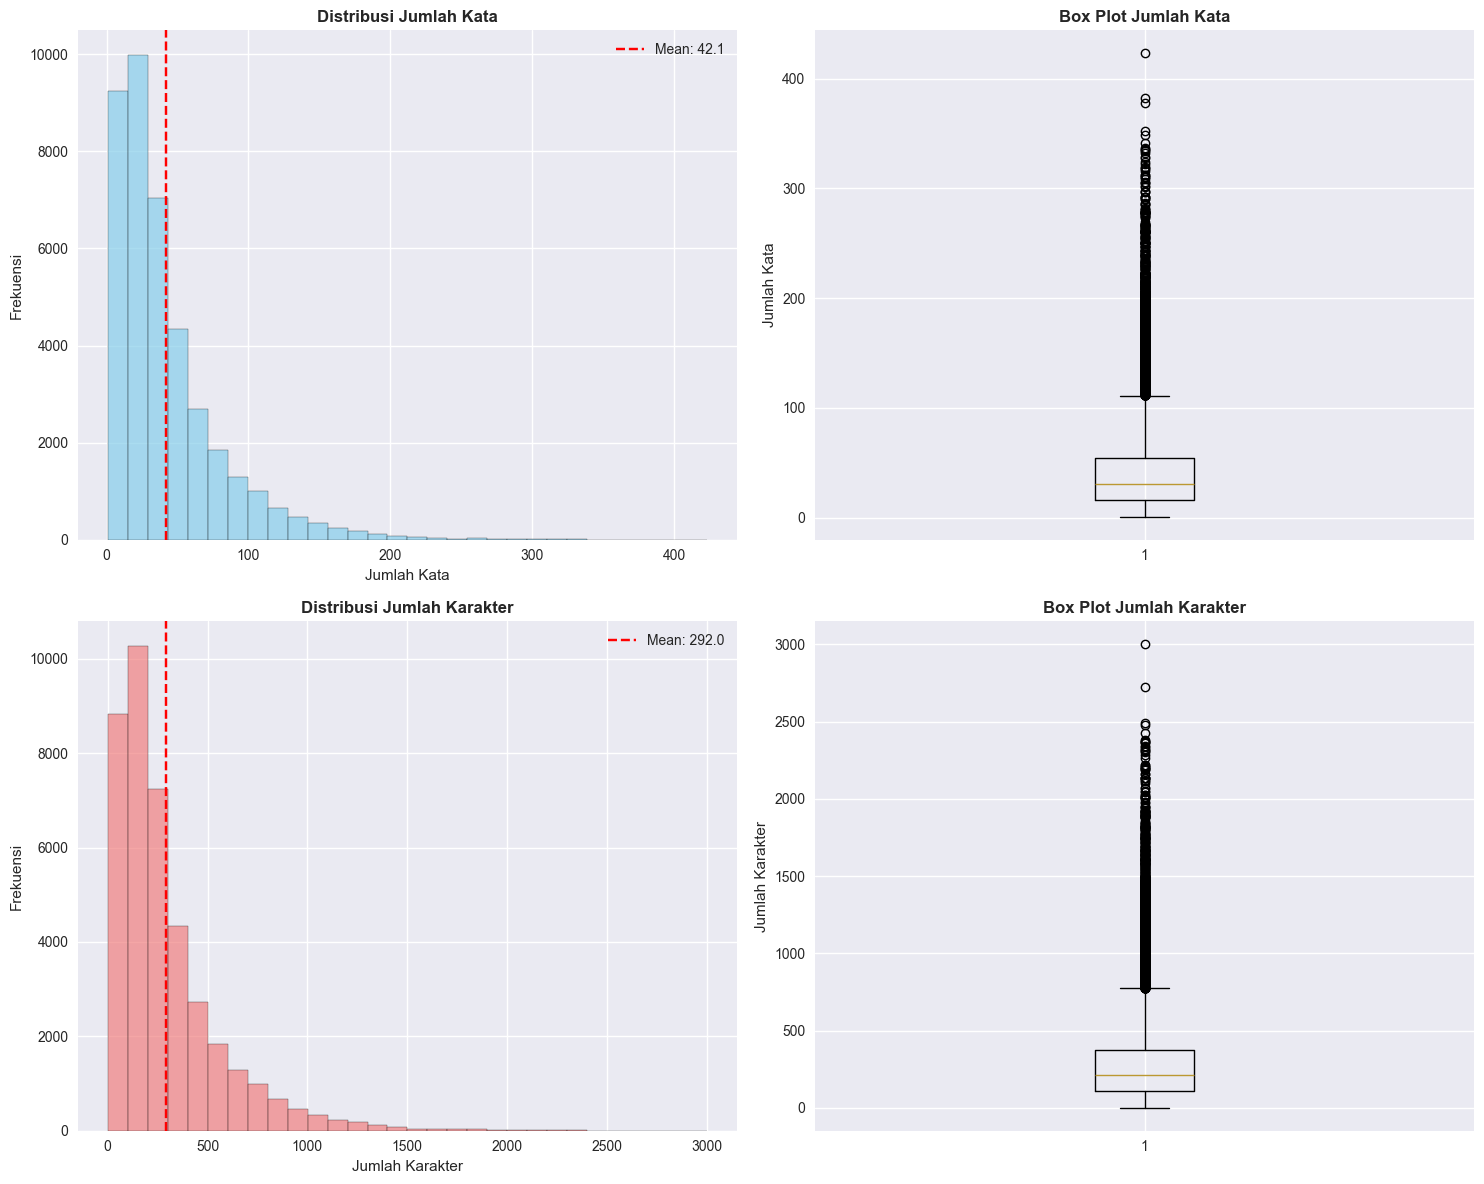


📊 Statistik Teks per Label:

  📋 Label 'halal' (21826 samples):
    Rata-rata kata: 27.87
    Rata-rata karakter: 190.01

  📋 Label 'haram' (17961 samples):
    Rata-rata kata: 59.46
    Rata-rata karakter: 415.92

💡 Rekomendasi max_length untuk tokenisasi: 119 kata
💾 Statistik teks disimpan untuk notebook selanjutnya


In [5]:
print("📝 ANALISIS KARAKTERISTIK TEKS")
print("=" * 50)

# Asumsi kolom teks bernama 'ingredients' atau 'text'
text_col = None
for col in df.columns:
    if col != label_col and df[col].dtype == 'object':
        text_col = col
        break

if text_col is None:
    text_col = df.columns[0]  # Gunakan kolom pertama jika tidak ditemukan
    print(f"⚠️ Kolom teks tidak ditemukan, menggunakan '{text_col}'")

print(f"\n📄 Menggunakan kolom '{text_col}' sebagai teks")

# Fungsi untuk menghitung statistik teks
def analyze_text_stats(texts):
    """Menghitung statistik dasar teks"""
    word_counts = []
    char_counts = []
    
    for text in texts:
        if pd.isna(text):
            word_counts.append(0)
            char_counts.append(0)
        else:
            words = str(text).split()
            word_counts.append(len(words))
            char_counts.append(len(str(text)))
    
    return {
        'word_count_min': min(word_counts),
        'word_count_max': max(word_counts),
        'word_count_mean': np.mean(word_counts),
        'word_count_median': np.median(word_counts),
        'word_count_std': np.std(word_counts),
        'char_count_min': min(char_counts),
        'char_count_max': max(char_counts),
        'char_count_mean': np.mean(char_counts),
        'char_count_median': np.median(char_counts),
        'char_count_std': np.std(char_counts),
        'word_counts': word_counts,
        'char_counts': char_counts
    }

# Analisis statistik teks keseluruhan
print("\n📊 Statistik Teks Keseluruhan:")
overall_stats = analyze_text_stats(df[text_col])

print(f"  Jumlah Kata:")
print(f"    Min: {overall_stats['word_count_min']} kata")
print(f"    Max: {overall_stats['word_count_max']} kata")
print(f"    Mean: {overall_stats['word_count_mean']:.2f} kata")
print(f"    Median: {overall_stats['word_count_median']:.2f} kata")
print(f"    Std: {overall_stats['word_count_std']:.2f} kata")

print(f"\n  Jumlah Karakter:")
print(f"    Min: {overall_stats['char_count_min']} karakter")
print(f"    Max: {overall_stats['char_count_max']} karakter")
print(f"    Mean: {overall_stats['char_count_mean']:.2f} karakter")
print(f"    Median: {overall_stats['char_count_median']:.2f} karakter")
print(f"    Std: {overall_stats['char_count_std']:.2f} karakter")

# Visualisasi distribusi panjang teks
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram jumlah kata
axes[0, 0].hist(overall_stats['word_counts'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribusi Jumlah Kata', fontweight='bold')
axes[0, 0].set_xlabel('Jumlah Kata')
axes[0, 0].set_ylabel('Frekuensi')
axes[0, 0].axvline(overall_stats['word_count_mean'], color='red', linestyle='--', label=f'Mean: {overall_stats["word_count_mean"]:.1f}')
axes[0, 0].legend()

# Box plot jumlah kata
axes[0, 1].boxplot(overall_stats['word_counts'])
axes[0, 1].set_title('Box Plot Jumlah Kata', fontweight='bold')
axes[0, 1].set_ylabel('Jumlah Kata')

# Histogram jumlah karakter
axes[1, 0].hist(overall_stats['char_counts'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribusi Jumlah Karakter', fontweight='bold')
axes[1, 0].set_xlabel('Jumlah Karakter')
axes[1, 0].set_ylabel('Frekuensi')
axes[1, 0].axvline(overall_stats['char_count_mean'], color='red', linestyle='--', label=f'Mean: {overall_stats["char_count_mean"]:.1f}')
axes[1, 0].legend()

# Box plot jumlah karakter
axes[1, 1].boxplot(overall_stats['char_counts'])
axes[1, 1].set_title('Box Plot Jumlah Karakter', fontweight='bold')
axes[1, 1].set_ylabel('Jumlah Karakter')

plt.tight_layout()
plt.show()

# Analisis per label
print("\n📊 Statistik Teks per Label:")
for label in df[label_col].unique():
    label_data = df[df[label_col] == label][text_col]
    label_stats = analyze_text_stats(label_data)
    
    print(f"\n  📋 Label '{label}' ({len(label_data)} samples):")
    print(f"    Rata-rata kata: {label_stats['word_count_mean']:.2f}")
    print(f"    Rata-rata karakter: {label_stats['char_count_mean']:.2f}")

# Simpan statistik untuk notebook selanjutnya
text_stats = {
    'text_column': text_col,
    'overall_stats': overall_stats,
    'recommended_max_length': int(overall_stats['word_count_mean'] + 2 * overall_stats['word_count_std'])
}

print(f"\n💡 Rekomendasi max_length untuk tokenisasi: {text_stats['recommended_max_length']} kata")
print(f"💾 Statistik teks disimpan untuk notebook selanjutnya")

## 6. ☁️ Word Cloud Analysis
Membuat word clouds untuk visualisasi kata-kata yang paling sering muncul.

☁️ WORD CLOUD ANALYSIS

1️⃣ Membuat Word Cloud untuk semua data...


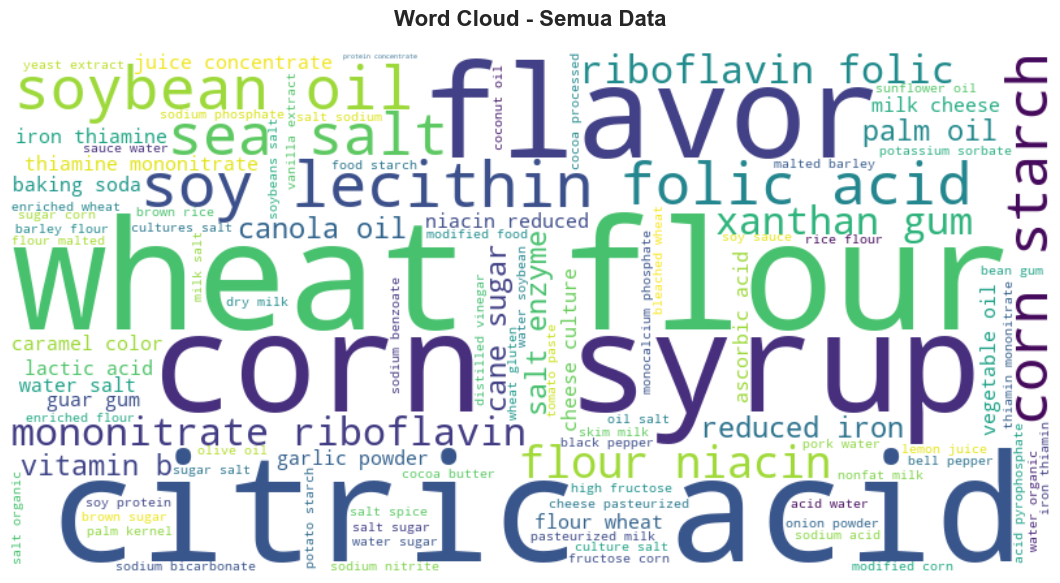


2️⃣ Membuat Word Cloud per label...


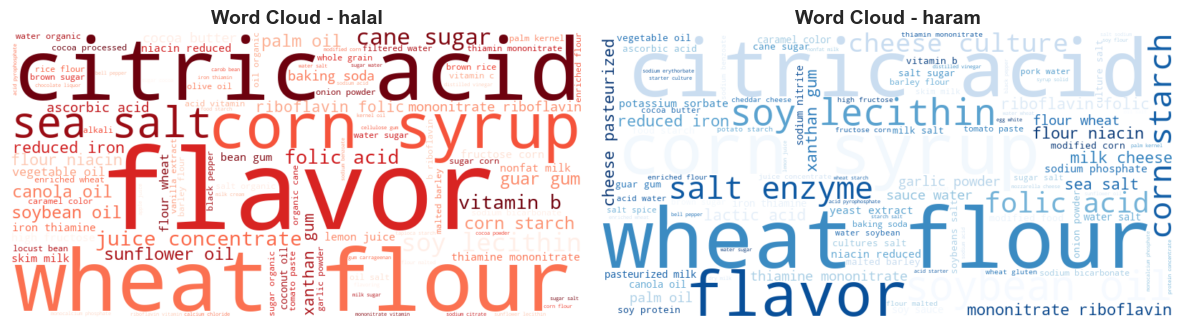


✅ Word cloud analysis selesai!


In [6]:
print("☁️ WORD CLOUD ANALYSIS")
print("=" * 50)

# Fungsi untuk membersihkan teks
def clean_text_for_wordcloud(text):
    """Membersihkan teks untuk word cloud"""
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Siapkan stopwords
stop_words = set(stopwords.words('english'))
# Tambahkan stopwords khusus untuk ingredients
custom_stopwords = {'and', 'or', 'with', 'contains', 'may', 'contain', 'less', 'than', 'added', 'natural', 'artificial'}
stop_words.update(custom_stopwords)

# Konfigurasi WordCloud
wordcloud_config = {
    'width': 800,
    'height': 400,
    'background_color': 'white',
    'max_words': 100,
    'stopwords': stop_words,
    'colormap': 'viridis'
}

# 1. Word Cloud untuk semua data
print("\n1️⃣ Membuat Word Cloud untuk semua data...")
all_text = ' '.join([clean_text_for_wordcloud(text) for text in df[text_col]])

if len(all_text.strip()) > 0:
    wordcloud_all = WordCloud(**wordcloud_config).generate(all_text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_all, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Semua Data', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Tidak ada teks yang valid untuk word cloud keseluruhan")

# 2. Word Cloud per label
print("\n2️⃣ Membuat Word Cloud per label...")
labels = df[label_col].unique()
n_labels = len(labels)

if n_labels <= 4:  # Jika label tidak terlalu banyak
    fig, axes = plt.subplots(1, n_labels, figsize=(6*n_labels, 6))
    if n_labels == 1:
        axes = [axes]
    
    for i, label in enumerate(labels):
        label_texts = df[df[label_col] == label][text_col]
        label_text = ' '.join([clean_text_for_wordcloud(text) for text in label_texts])
        
        if len(label_text.strip()) > 0:
            # Gunakan colormap yang berbeda untuk setiap label
            colormaps = ['Reds', 'Blues', 'Greens', 'Oranges']
            wordcloud_config['colormap'] = colormaps[i % len(colormaps)]
            
            wordcloud_label = WordCloud(**wordcloud_config).generate(label_text)
            
            axes[i].imshow(wordcloud_label, interpolation='bilinear')
            axes[i].axis('off')
            axes[i].set_title(f'Word Cloud - {label}', fontsize=14, fontweight='bold')
        else:
            axes[i].text(0.5, 0.5, f'No valid text\nfor {label}', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    # Jika terlalu banyak label, buat satu per satu
    for label in labels:
        label_texts = df[df[label_col] == label][text_col]
        label_text = ' '.join([clean_text_for_wordcloud(text) for text in label_texts])
        
        if len(label_text.strip()) > 0:
            wordcloud_label = WordCloud(**wordcloud_config).generate(label_text)
            
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud_label, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud - {label}', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.show()

print("\n✅ Word cloud analysis selesai!")

## 7. 🔤 N-grams Analysis
Menganalisis bigrams dan trigrams untuk menemukan pola frasa yang sering muncul.

🔤 N-GRAMS ANALYSIS

1️⃣ Analisis Bigrams (2-kata)
------------------------------

📊 Top 20 Bigrams - Semua Data:
   1. 'wheat flour' - 13870 kali
   2. 'citric acid' - 13048 kali
   3. 'corn syrup' - 11154 kali
   4. 'soy lecithin' - 8560 kali
   5. 'soybean oil' - 7558 kali
   6. 'folic acid' - 7410 kali
   7. 'sea salt' - 7273 kali
   8. 'corn starch' - 7006 kali
   9. 'riboflavin folic' - 5750 kali
  10. 'flour niacin' - 5559 kali


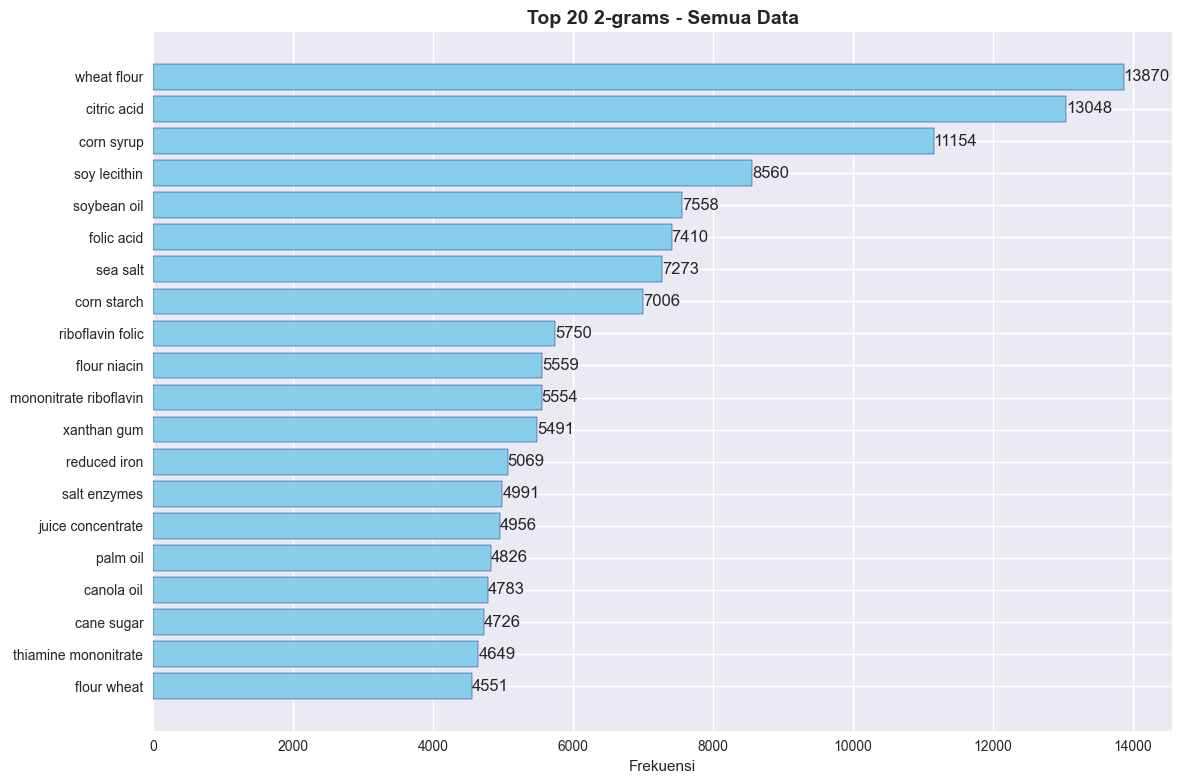


📊 Top 10 Bigrams per Label:

  📋 Label 'halal':
    1. 'citric acid' - 4890 kali
    2. 'wheat flour' - 4790 kali
    3. 'corn syrup' - 4634 kali
    4. 'sea salt' - 3923 kali
    5. 'soy lecithin' - 3554 kali


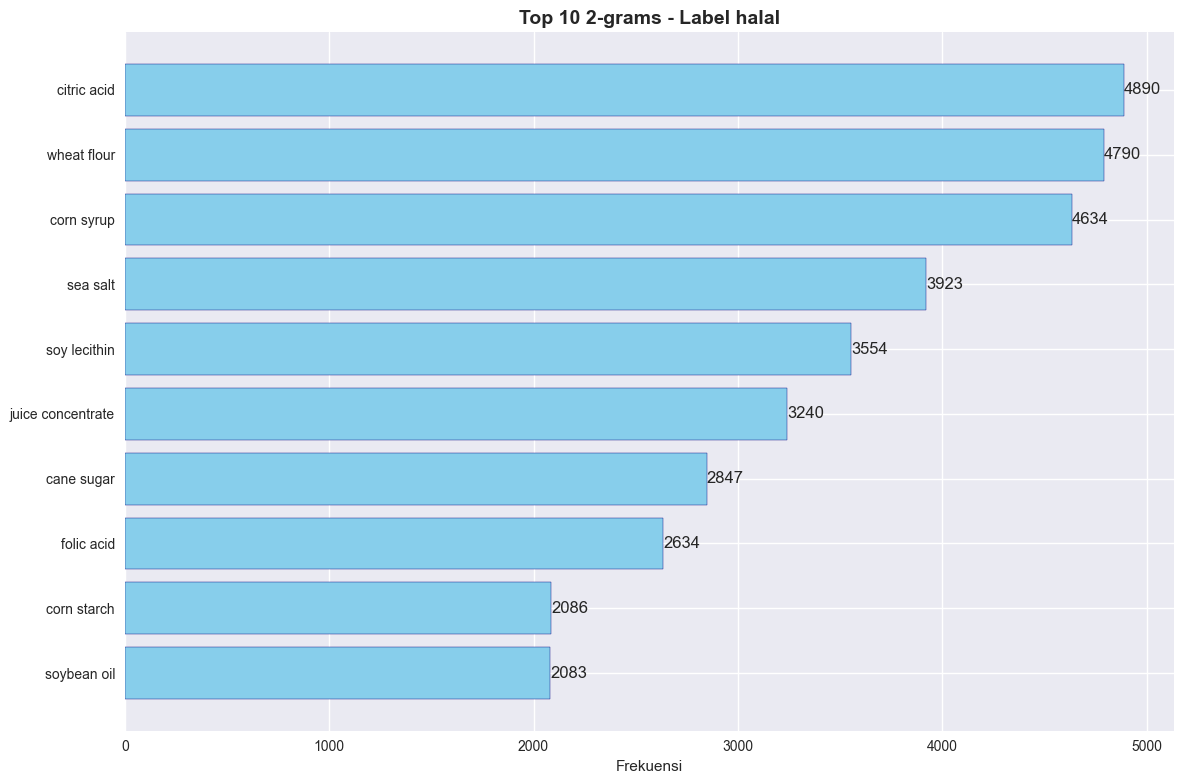


  📋 Label 'haram':
    1. 'wheat flour' - 9080 kali
    2. 'citric acid' - 8158 kali
    3. 'corn syrup' - 6520 kali
    4. 'soybean oil' - 5475 kali
    5. 'soy lecithin' - 5006 kali


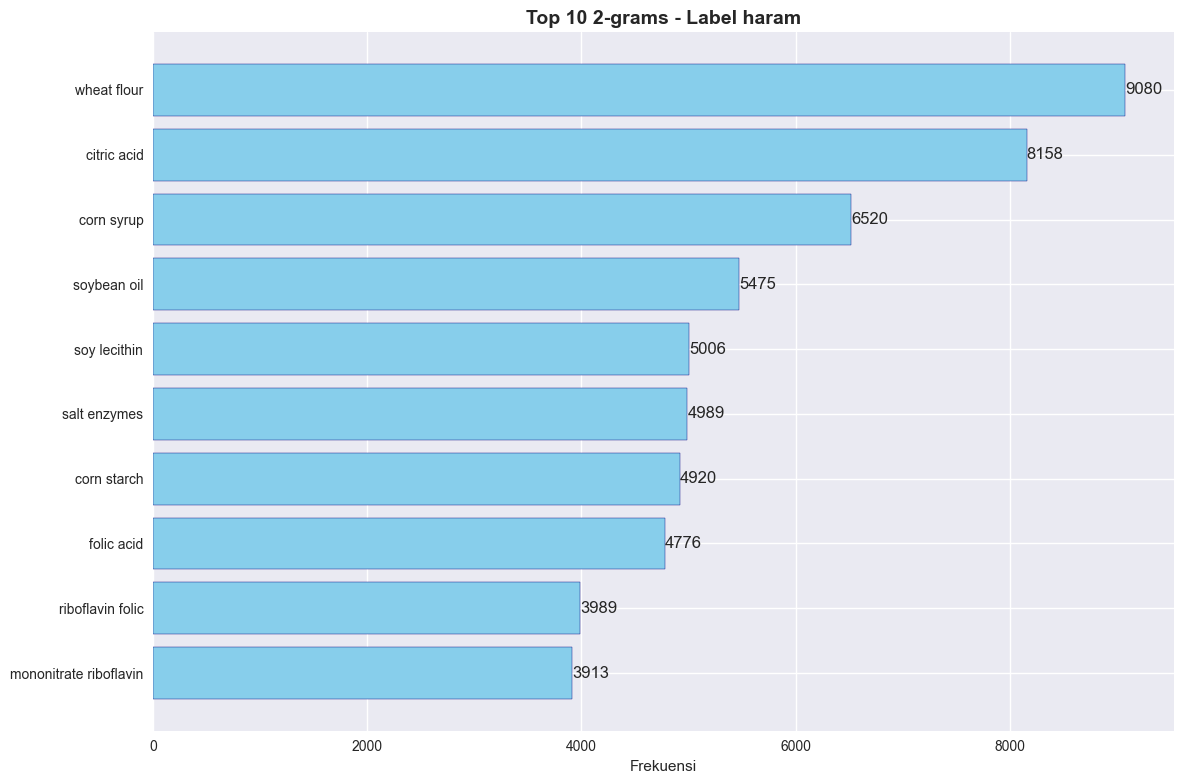



2️⃣ Analisis Trigrams (3-kata)
------------------------------

📊 Top 15 Trigrams - Semua Data:
   1. 'riboflavin folic acid' - 5742 kali
   2. 'mononitrate riboflavin folic' - 5357 kali
   3. 'niacin reduced iron' - 4311 kali
   4. 'flour wheat flour' - 4267 kali
   5. 'flour niacin reduced' - 4026 kali
   6. 'thiamine mononitrate riboflavin' - 3938 kali
   7. 'iron thiamine mononitrate' - 3795 kali
   8. 'wheat flour niacin' - 3215 kali
   9. 'reduced iron thiamine' - 3182 kali
  10. 'fructose corn syrup' - 2950 kali


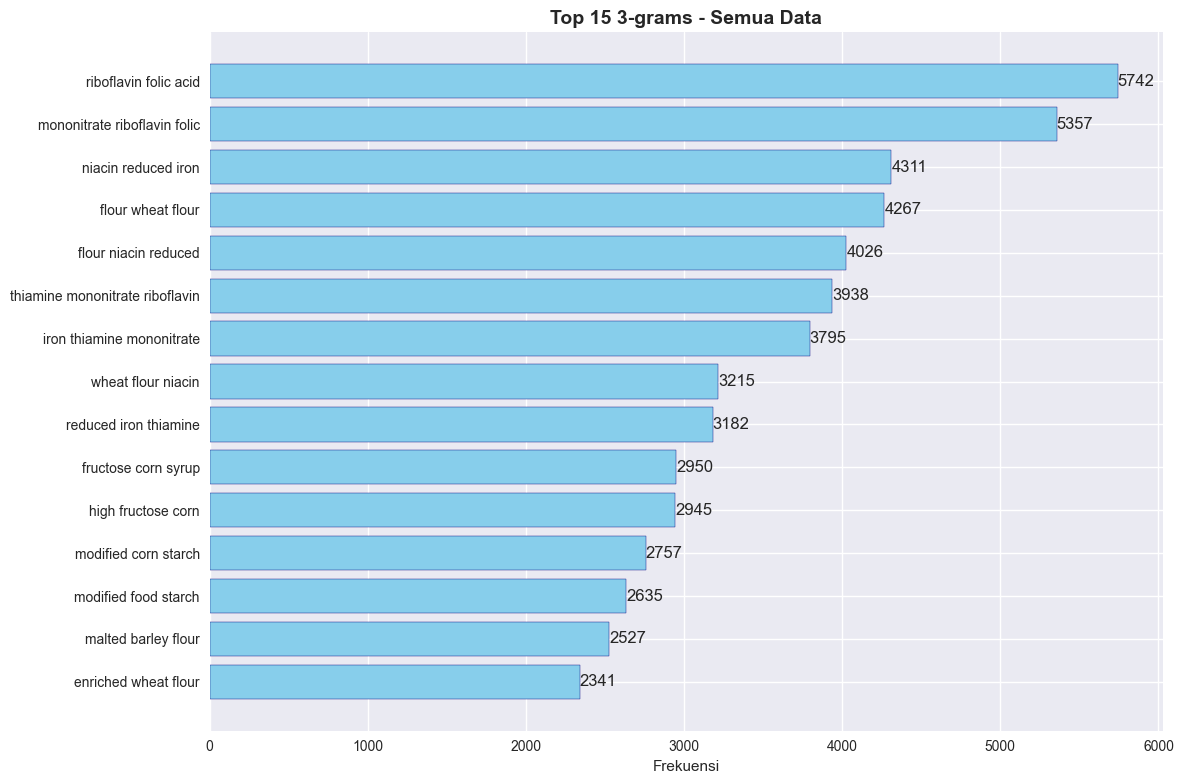


📊 Top 8 Trigrams per Label:

  📋 Label 'halal':
    1. 'riboflavin folic acid' - 1757 kali
    2. 'mononitrate riboflavin folic' - 1586 kali
    3. 'niacin reduced iron' - 1470 kali
    4. 'flour wheat flour' - 1454 kali
    5. 'high fructose corn' - 1431 kali


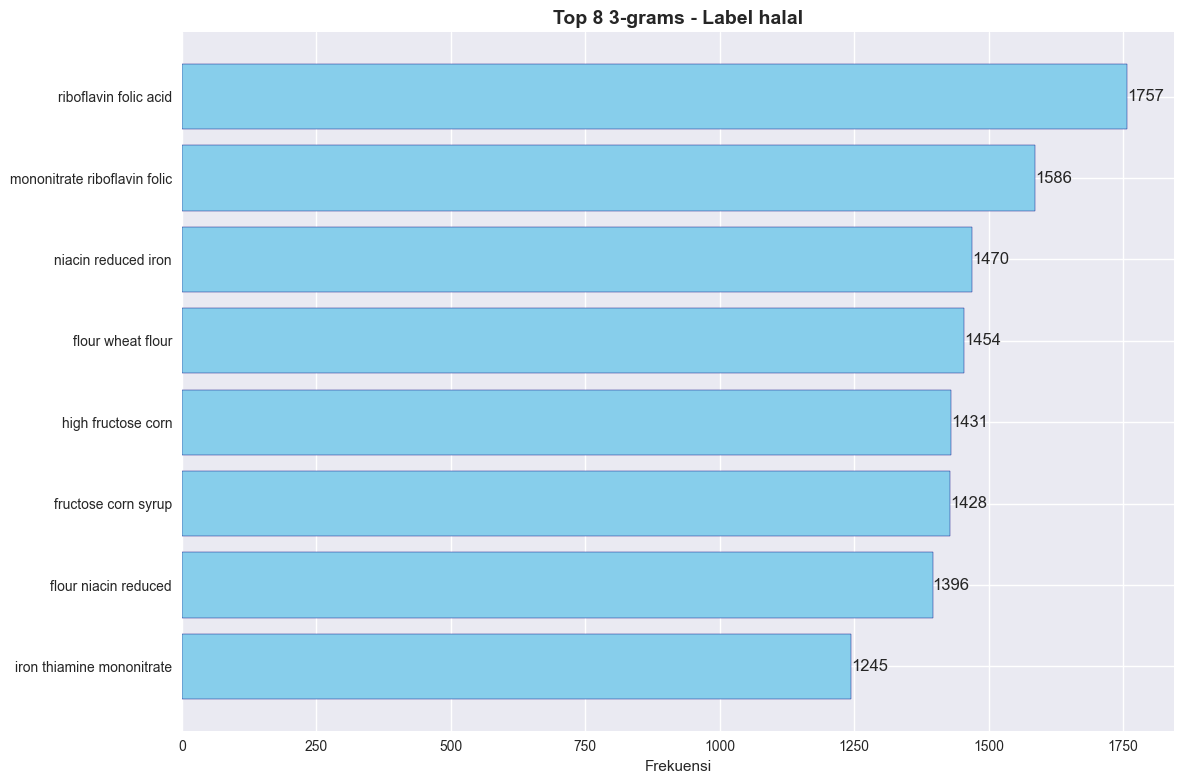


  📋 Label 'haram':
    1. 'riboflavin folic acid' - 3985 kali
    2. 'mononitrate riboflavin folic' - 3771 kali
    3. 'niacin reduced iron' - 2841 kali
    4. 'thiamine mononitrate riboflavin' - 2833 kali
    5. 'flour wheat flour' - 2813 kali


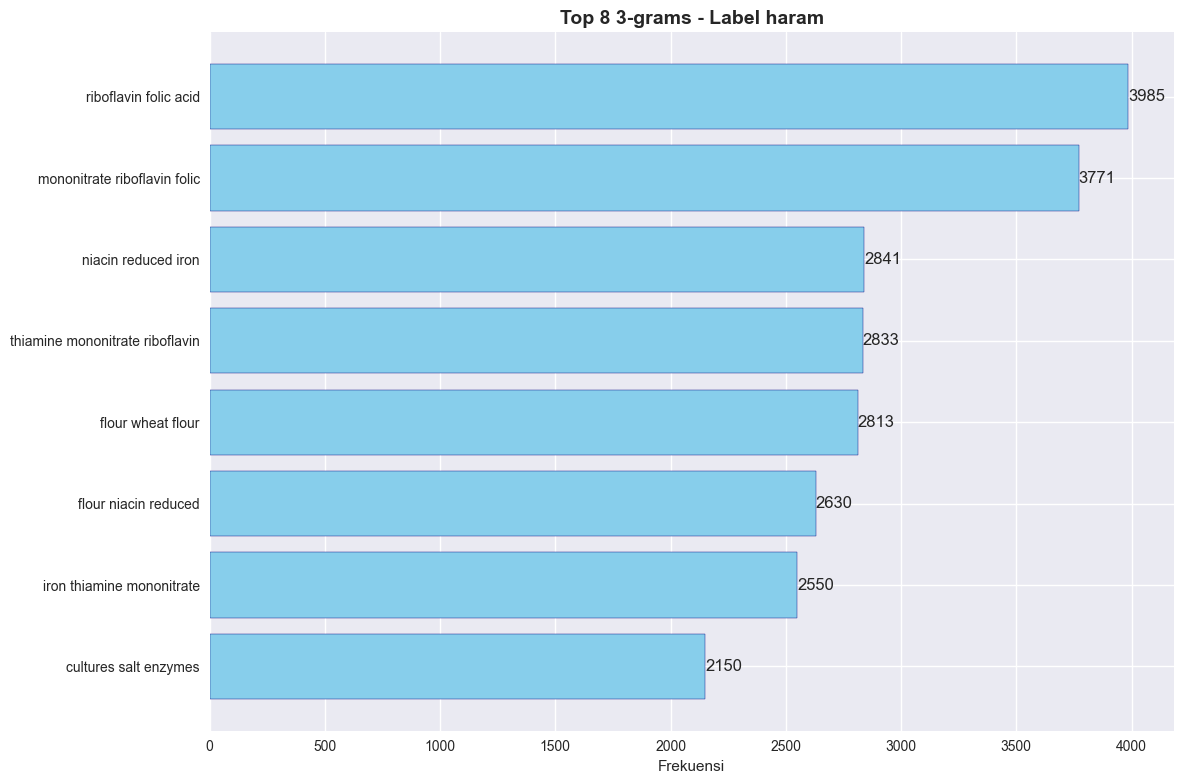


✅ N-grams analysis selesai!
💾 N-grams data disimpan untuk analisis lebih lanjut


In [7]:
print("🔤 N-GRAMS ANALYSIS")
print("=" * 50)

# Fungsi untuk ekstraksi n-grams
def extract_ngrams(texts, n=2, top_k=20):
    """Ekstraksi top-k n-grams dari teks"""
    # Gabungkan semua teks
    all_text = ' '.join([clean_text_for_wordcloud(text) for text in texts if pd.notna(text)])
    
    if len(all_text.strip()) == 0:
        return []
    
    # Tokenisasi
    tokens = word_tokenize(all_text.lower())
    
    # Filter stopwords dan kata pendek
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    
    # Generate n-grams
    n_grams = list(ngrams(tokens, n))
    
    # Hitung frekuensi
    ngram_freq = Counter(n_grams)
    
    # Return top-k
    return ngram_freq.most_common(top_k)

# Fungsi untuk visualisasi n-grams
def plot_ngrams(ngrams_list, title, n=2):
    """Plot n-grams dalam bar chart"""
    if not ngrams_list:
        print(f"⚠️ Tidak ada {n}-grams yang ditemukan untuk {title}")
        return
    
    # Siapkan data
    ngrams_text = [' '.join(ngram) for ngram, freq in ngrams_list]
    frequencies = [freq for ngram, freq in ngrams_list]
    
    # Plot
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(ngrams_text)), frequencies, color='skyblue', edgecolor='navy')
    plt.yticks(range(len(ngrams_text)), ngrams_text)
    plt.xlabel('Frekuensi')
    plt.title(f'Top {len(ngrams_list)} {n}-grams - {title}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Tambahkan nilai di ujung bar
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                str(frequencies[i]), ha='left', va='center')
    
    plt.tight_layout()
    plt.show()

# 1. Analisis Bigrams (2-grams)
print("\n1️⃣ Analisis Bigrams (2-kata)")
print("-" * 30)

# Bigrams untuk semua data
print("\n📊 Top 20 Bigrams - Semua Data:")
all_bigrams = extract_ngrams(df[text_col], n=2, top_k=20)
for i, (bigram, freq) in enumerate(all_bigrams[:10], 1):
    print(f"  {i:2d}. '{' '.join(bigram)}' - {freq} kali")

plot_ngrams(all_bigrams, "Semua Data", n=2)

# Bigrams per label
print("\n📊 Top 10 Bigrams per Label:")
for label in df[label_col].unique():
    label_data = df[df[label_col] == label][text_col]
    label_bigrams = extract_ngrams(label_data, n=2, top_k=10)
    
    print(f"\n  📋 Label '{label}':")
    for i, (bigram, freq) in enumerate(label_bigrams[:5], 1):
        print(f"    {i}. '{' '.join(bigram)}' - {freq} kali")
    
    if label_bigrams:
        plot_ngrams(label_bigrams, f"Label {label}", n=2)

# 2. Analisis Trigrams (3-grams)
print("\n\n2️⃣ Analisis Trigrams (3-kata)")
print("-" * 30)

# Trigrams untuk semua data
print("\n📊 Top 15 Trigrams - Semua Data:")
all_trigrams = extract_ngrams(df[text_col], n=3, top_k=15)
for i, (trigram, freq) in enumerate(all_trigrams[:10], 1):
    print(f"  {i:2d}. '{' '.join(trigram)}' - {freq} kali")

plot_ngrams(all_trigrams, "Semua Data", n=3)

# Trigrams per label
print("\n📊 Top 8 Trigrams per Label:")
for label in df[label_col].unique():
    label_data = df[df[label_col] == label][text_col]
    label_trigrams = extract_ngrams(label_data, n=3, top_k=8)
    
    print(f"\n  📋 Label '{label}':")
    for i, (trigram, freq) in enumerate(label_trigrams[:5], 1):
        print(f"    {i}. '{' '.join(trigram)}' - {freq} kali")
    
    if label_trigrams:
        plot_ngrams(label_trigrams, f"Label {label}", n=3)

# Simpan n-grams untuk analisis lebih lanjut
ngrams_analysis = {
    'all_bigrams': all_bigrams,
    'all_trigrams': all_trigrams,
    'label_specific_ngrams': {}
}

for label in df[label_col].unique():
    label_data = df[df[label_col] == label][text_col]
    ngrams_analysis['label_specific_ngrams'][label] = {
        'bigrams': extract_ngrams(label_data, n=2, top_k=10),
        'trigrams': extract_ngrams(label_data, n=3, top_k=8)
    }

print("\n✅ N-grams analysis selesai!")
print("💾 N-grams data disimpan untuk analisis lebih lanjut")

## 8. 💡 Key Insights dan Kesimpulan
Merangkum temuan penting dari analisis data untuk strategi modeling.

In [8]:
print("💡 KEY INSIGHTS DAN KESIMPULAN")
print("=" * 50)

# Rangkuman insights
insights = []

# 1. Dataset size dan quality
insights.append(f"📊 Dataset memiliki {df.shape[0]} samples dengan {df.shape[1]} kolom")
if df.isnull().sum().sum() == 0:
    insights.append("✅ Dataset bersih tanpa missing values")
else:
    insights.append(f"⚠️ Dataset memiliki {df.isnull().sum().sum()} missing values")

# 2. Label distribution
imbalance_ratio = label_percentages.max() / label_percentages.min()
if imbalance_ratio < 1.5:
    insights.append(f"⚖️ Dataset SEIMBANG (rasio {imbalance_ratio:.2f}:1) - tidak perlu balancing khusus")
elif imbalance_ratio < 3:
    insights.append(f"⚠️ Dataset SEDIKIT TIDAK SEIMBANG (rasio {imbalance_ratio:.2f}:1) - pertimbangkan class weights")
else:
    insights.append(f"❌ Dataset SANGAT TIDAK SEIMBANG (rasio {imbalance_ratio:.2f}:1) - perlu teknik balancing")

# 3. Text characteristics
avg_words = overall_stats['word_count_mean']
max_words = overall_stats['word_count_max']
insights.append(f"📝 Rata-rata panjang teks: {avg_words:.1f} kata (max: {max_words} kata)")
insights.append(f"🎯 Rekomendasi max_length untuk tokenisasi: {text_stats['recommended_max_length']} kata")

# 4. Key patterns dari n-grams
if all_bigrams:
    top_bigram = ' '.join(all_bigrams[0][0])
    insights.append(f"🔤 Bigram paling umum: '{top_bigram}' ({all_bigrams[0][1]} kali)")

if all_trigrams:
    top_trigram = ' '.join(all_trigrams[0][0])
    insights.append(f"🔤 Trigram paling umum: '{top_trigram}' ({all_trigrams[0][1]} kali)")

# 5. Modeling recommendations
modeling_recommendations = []

if avg_words < 20:
    modeling_recommendations.append("📱 Teks pendek - cocok untuk model ringan (FastText, 1D CNN)")
elif avg_words < 50:
    modeling_recommendations.append("📄 Teks sedang - cocok untuk LSTM/GRU dengan sequence length moderat")
else:
    modeling_recommendations.append("📚 Teks panjang - pertimbangkan attention mechanism atau truncation")

if imbalance_ratio > 2:
    modeling_recommendations.append("⚖️ Gunakan class_weight atau focal loss untuk mengatasi imbalance")

modeling_recommendations.append(f"🎯 Set max_length = {text_stats['recommended_max_length']} untuk menangkap 95% data")
modeling_recommendations.append("🚀 Prioritas model: 1D CNN → FastText → LSTM/GRU (berdasarkan kompleksitas)")

# Print insights
print("\n🔍 TEMUAN UTAMA:")
for i, insight in enumerate(insights, 1):
    print(f"  {i}. {insight}")

print("\n🎯 REKOMENDASI MODELING:")
for i, rec in enumerate(modeling_recommendations, 1):
    print(f"  {i}. {rec}")

# Simpan summary untuk notebook selanjutnya
analysis_summary = {
    'dataset_info': {
        'total_samples': df.shape[0],
        'total_features': df.shape[1],
        'has_missing_values': df.isnull().sum().sum() > 0,
        'missing_count': df.isnull().sum().sum()
    },
    'label_info': label_info,
    'text_stats': text_stats,
    'ngrams_analysis': ngrams_analysis,
    'insights': insights,
    'modeling_recommendations': modeling_recommendations
}

# Simpan ke file JSON untuk notebook selanjutnya
import json
import copy

def make_json_safe(obj):
    """Konversi objek ke format yang aman untuk JSON serialization"""
    if isinstance(obj, (np.integer, int)):
        return int(obj)
    elif isinstance(obj, (np.floating, float)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {k: make_json_safe(v) for k, v in obj.items()}
    elif isinstance(obj, (list, tuple)):
        return [make_json_safe(item) for item in obj]
    elif isinstance(obj, str):
        return obj
    elif obj is None:
        return None
    else:
        # Untuk objek lain, coba konversi ke string
        try:
            return str(obj)
        except:
            return None

with open('data_analysis_summary.json', 'w', encoding='utf-8') as f:
    # Buat copy yang aman dan konversi ke format JSON-safe
    clean_summary = make_json_safe(copy.deepcopy(analysis_summary))
    json.dump(clean_summary, f, indent=2, ensure_ascii=False)

print("\n💾 Analysis summary disimpan ke 'data_analysis_summary.json'")
print("\n✅ Data exploration dan analysis selesai!")
print("\n🚀 Lanjutkan ke notebook berikutnya: 02_Preprocessing_and_Baseline_Models.ipynb")

💡 KEY INSIGHTS DAN KESIMPULAN

🔍 TEMUAN UTAMA:
  1. 📊 Dataset memiliki 39787 samples dengan 2 kolom
  2. ✅ Dataset bersih tanpa missing values
  3. ⚖️ Dataset SEIMBANG (rasio 1.22:1) - tidak perlu balancing khusus
  4. 📝 Rata-rata panjang teks: 42.1 kata (max: 423 kata)
  5. 🎯 Rekomendasi max_length untuk tokenisasi: 119 kata
  6. 🔤 Bigram paling umum: 'wheat flour' (13870 kali)
  7. 🔤 Trigram paling umum: 'riboflavin folic acid' (5742 kali)

🎯 REKOMENDASI MODELING:
  1. 📄 Teks sedang - cocok untuk LSTM/GRU dengan sequence length moderat
  2. 🎯 Set max_length = 119 untuk menangkap 95% data
  3. 🚀 Prioritas model: 1D CNN → FastText → LSTM/GRU (berdasarkan kompleksitas)

💾 Analysis summary disimpan ke 'data_analysis_summary.json'

✅ Data exploration dan analysis selesai!

🚀 Lanjutkan ke notebook berikutnya: 02_Preprocessing_and_Baseline_Models.ipynb


## 🚀 Next Steps

Berdasarkan analisis di atas, langkah selanjutnya adalah:

1. **Preprocessing Data** (Notebook 02):
   - Buat train/validation/test split yang konsisten
   - Implementasi text preprocessing yang optimal
   - Buat baseline model dengan TF-IDF

2. **Model Development** (Notebook 03):
   - Implementasi model FastText/CBOW
   - Implementasi model LSTM
   - Implementasi model GRU
   - Perbandingan performa ketiga model

3. **Final Evaluation** (Notebook 04):
   - Evaluasi model terbaik pada test set
   - Export ke TensorFlow Lite
   - Persiapan deployment artifacts

---

**File yang dihasilkan dari notebook ini**:
- `data_analysis_summary.json` - Ringkasan analisis untuk notebook selanjutnya

**Insights utama untuk modeling**:
- Dataset seimbang/tidak seimbang: [akan diisi otomatis]
- Panjang teks rata-rata: [akan diisi otomatis]
- Rekomendasi max_length: [akan diisi otomatis]
- Kata/frasa kunci yang membedakan kelas: [dari n-grams analysis]